Via a twitter thread about how to talk about propagating uncertainty, https://twitter.com/RyTriGuy/status/1170409012074033154

Here's a story.  There's a lot of traffic on the street next to school.  You decide to (1) calculate how fast cars are driving and (2) estimate the cars' average kinetic energy.  

You take a bunch of data with video analysis.  The thing you measure is the time it takes the cars to move past a set length.

The set length is 3.0 meters.  The uncertainty in this length is 0.2 m

Cars are moving at 30mph (15m/s) so the typical time you measure is $\frac{3.0m}{15m/s} = 0.2s$.  Your time uncertainty is estimated to be 0.1s.

Most of the cars look like small sedans, mass = 1200kg.  Uncertainty is 200kg.

If you have a random variable on the interval (0,1) you can transform it to the interval (-1,1) via $2.0*(random-0.5)$.  So, a random mass (with uncertainty) can be generated with, 

$mass = m0 + dm*2.0*(np.random.rand(N)-0.5)$

The python numpy operates on vectors of numbers, so the line above actually generates N random mass values.  This is a neat feature!

So here's an example calculation.  Note, I'm using flatly defined random variable distributions.  Using Gaussian pdf's might be more realistic.

Nathan Moore,
Winona State University,
nmoore@winona.edu

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# how many different estimation points?
N=1000
# estimated mass
m0=1200
# uncertainty in mass
dm=200
# generate N estimations of mass
mass=m0+dm*2.0*(np.random.rand(N)-0.5)

Text(0.5, 0, 'mass (kg)')

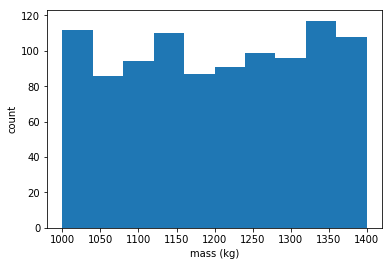

In [28]:
# now, make a histogram of mass values
plt.hist(mass)
plt.ylabel("count")
plt.xlabel("mass (kg)")

Text(0.5, 0, 'distance the car travels (m)')

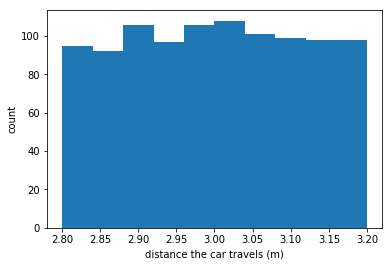

In [29]:
# imagine that you're measuring speed by tracking the amount of time it takes for a car to go by a set distance.  
d0 = 3 # meters
dd = 0.2 # meters
distance = mass=d0+dd*2.0*(np.random.rand(N)-0.5)
# now, make a histogram of distance values
plt.hist(distance)
plt.ylabel("count")
plt.xlabel("distance the car travels (m)")

Text(0.5, 0, 'time the car takes to travel a set distance (s)')

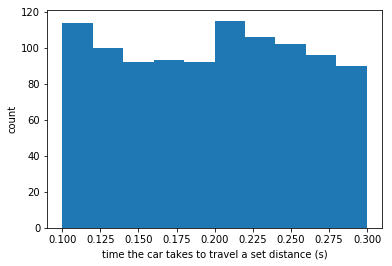

In [30]:
# Same operation for measuring the time the car takes to travel a distance
t0=d0/15.0 # assuming the car is travelling at 30mph ~=15m/s
dt = 0.1 # time uncetainty (s)
time = t0+dt*2.0*(np.random.rand(N)-0.5)
# now, make a histogram of distance values
plt.hist(time)
plt.ylabel("count")
plt.xlabel("time the car takes to travel a set distance (s)")

Text(0.5, 0, 'car speed (estimated, m/s)')

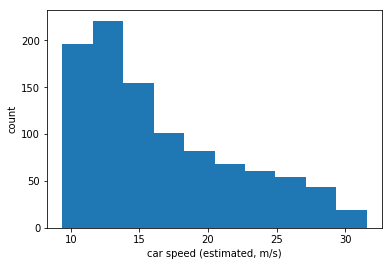

In [31]:
# now, use the time and distance variables to make a histogram of car speeds
speed = distance/time
plt.hist(speed)
plt.ylabel("count")
plt.xlabel("car speed (estimated, m/s)")

'The car has average KE (J) = '

463.20932390307564

'standard deviation is +/-'

321.89841318788496

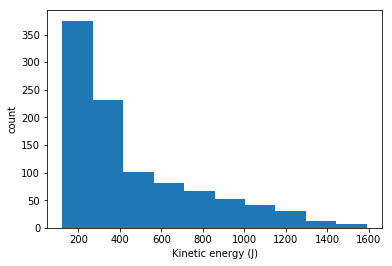

In [32]:
# then, use the estimated speed to make a historgam for car kinetic energy
KE=0.5*mass*speed**2
plt.hist(KE)
plt.ylabel("count")
plt.xlabel("Kinetic energy (J)")
display("The car has average KE (J) = ",KE.mean())
display("standard deviation is +/-",KE.std())